# OLA - Ensemble Learning

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

## Problem Statement

* OLA driver chrun data is provied. Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. 
* Objective is to identify potential drivers which can leave so that the business can take necessary actions in order avoid a driver churn.

## Data shape, type, column data conversion

In [2]:
data = pd.read_csv("ola_driver.csv")
print("Dataframe is of shape : ",data.shape)
data.head(10)

Dataframe is of shape :  (19104, 14)


,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
5,5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
6,6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
7,7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
8,8,03/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,350000,1
9,9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1


In [3]:
# listing columns and their datatypes
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB
None


Column Profiles

<ol>
    <li>MMMM-YY : Reporting Date (Monthly)</li>
    <li>Driver_ID : Unique id for drivers</li>
    <li>Age : Age of the driver</li>
    <li>Gender : Gender of the driver – Male : 0, Female: 1</li>
    <li>City : City Code of the driver</li>
    <li>Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate</li>
    <li>Income : Monthly average Income of the driver</li>
    <li>Date Of Joining : Joining date for the driver</li>
    <li>LastWorkingDate : Last date of working for the driver</li>
    <li>Joining Designation : Designation of the driver at the time of joining</li>
    <li>Grade : Grade of the driver at the time of reporting</li>
    <li>Total Business Value : The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)</li>
    <li>Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)</li>
</ol>

### Checking Missing values  

In [4]:
data.isna().sum()

Unnamed: 0                  0
MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

We can observe there are null values in Age, Gender and LastWorkingDate. Most of the drivers are currently working that is why there is huge number of null entries in the column LastWorkingDate.

###  Statistical Summary

In [5]:
data.describe()

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


<li>It can be observed that mean age for drivers is 34 and minimum age is 21 while max age is 58.</li>
<li>Considering gender mappings, the mean states that Male drivers are more. Also Education level of most of the drivers is 12th+.</li>
<li>Let us visualize these feature distributions in further part of this notebook.</li>

#### Dataset Preparation and combining on Driver ID

##### Removal of unnecessary index column

In [6]:
data = data.drop('Unnamed: 0',axis=1)

In [7]:
groupby_object = data.groupby('Driver_ID')

# counting number of unique values in group by object
unique_counts = groupby_object.nunique()
unique_counts

,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
Driver_ID,,,,,,,,,,,,
1,3,1,1,1,1,1,1,1,1,1,3,1
2,2,1,1,1,1,1,1,0,1,1,1,1
4,5,1,1,1,1,1,1,1,1,1,2,1
5,3,1,1,1,1,1,1,1,1,1,2,1
6,5,1,1,1,1,1,1,0,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2784,24,2,1,1,1,1,1,0,1,1,23,3
2785,3,1,1,1,1,1,1,1,1,1,1,1
2786,9,2,1,1,1,1,1,1,1,1,7,2


In [8]:
# checking any column has values other than 1 so that those are not unique for each driver ID
unique_counts[unique_counts==1].isna().any()

MMM-YY                   True
Age                      True
Gender                  False
City                    False
Education_Level         False
Income                   True
Dateofjoining           False
LastWorkingDate          True
Joining Designation     False
Grade                    True
Total Business Value     True
Quarterly Rating         True
dtype: bool

<li>We can observe that Gender, City, Education Level, DateOfjoining, Joining Designation are unique to each driver ID.</li>
<li>Thus these can be picked as it is from parent dataframe. For others, we can decide how to create a value for a group of values.</li>

##### Creating flags for income and rating

We can decide on below strategy for each of the columns which do not have unique value for Driver IDs.

<ol>
    <li>Age - Age will be unique for each driver ID but as we know there are null values in this column, we can check and inpute missing values later.</li>
    <li>Income - We can take maximum income among all different values.</li>
    <li>LastWorkingDate - Except for last row, all other rows are null thus we can pick last row in each group. </li>
    <li>Grade - We can take maximum grade a particular driver had by grouping on Driver ID.</li>
    <li>Total Business Value - We can take a mean value for the total business value by grouping on Driver ID. (We can also create a flag if revenue has ever been negative throughout the duration)</li>
    <li>Quarterly Rating - We can take maximum rating a driver has obtained by grouping on Driver ID. (We can create a flag indicating whether the rating has increased throuout the duration.</li>
</ol>

In [9]:
grouped_data = data.groupby('Driver_ID').last().reset_index()

grouped_data.head()

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1,03/01/19,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
1,2,12/01/20,31.0,0.0,C7,2,67016,11/06/20,None,2,2,0,1
2,4,04/01/20,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1
3,5,03/01/19,29.0,0.0,C9,0,46368,01/09/19,03/07/19,1,1,0,1
4,6,12/01/20,31.0,1.0,C11,1,78728,31/07/20,None,3,3,0,2


In [10]:
grouped_data.isna().any()

Driver_ID               False
MMM-YY                  False
Age                     False
Gender                  False
City                    False
Education_Level         False
Income                  False
Dateofjoining           False
LastWorkingDate          True
Joining Designation     False
Grade                   False
Total Business Value    False
Quarterly Rating        False
dtype: bool

<li>After performing group by operation, we can see that only LastWorkingDate has null values which is acceptable since we have generate a label from this column.</li>
<li>Thus KNN based imputation is not required here.</li>

In [11]:
# Creating features with group by conditions

groupby_object = data.groupby('Driver_ID')

# Creating a dict like object so that each driver ID can be mapped to respective max Income values
max_income_data = groupby_object['Income'].max()
grouped_data['Income'] = grouped_data.apply(lambda x:max_income_data[x.Driver_ID],axis=1)

# Processing similiar to Income column
last_LastWorkingDate = groupby_object['LastWorkingDate'].last()
grouped_data['LastWorkingDate'] = grouped_data.apply(lambda x:last_LastWorkingDate[x.Driver_ID],axis=1)

# Processing similiar to Income column
max_Grade = groupby_object['Grade'].max()
grouped_data['Grade'] = grouped_data.apply(lambda x:max_Grade[x.Driver_ID],axis=1)

# Processing similiar to Income column
mean_Total_Business_Value = groupby_object['Total Business Value'].mean()
grouped_data['Total_Business_Value'] = grouped_data.apply(lambda x:mean_Total_Business_Value[x.Driver_ID],axis=1)
grouped_data.drop('Total Business Value',inplace=True,axis=1)

# Processing similiar to Income column
max_Quarterly_Rating = groupby_object['Quarterly Rating'].max()
grouped_data['Quarterly_Rating'] = grouped_data.apply(lambda x:max_Quarterly_Rating[x.Driver_ID],axis=1)
grouped_data.drop('Quarterly Rating',inplace=True,axis=1)

In [12]:
grouped_data

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total_Business_Value,Quarterly_Rating
0,1,03/01/19,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,571860.000000,2
1,2,12/01/20,31.0,0.0,C7,2,67016,11/06/20,None,2,2,0.000000,1
2,4,04/01/20,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,70000.000000,1
3,5,03/01/19,29.0,0.0,C9,0,46368,01/09/19,03/07/19,1,1,40120.000000,1
4,6,12/01/20,31.0,1.0,C11,1,78728,31/07/20,None,3,3,253000.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,12/01/20,34.0,0.0,C24,0,82815,15/10/15,None,2,3,906200.833333,4
2377,2785,10/01/20,34.0,1.0,C9,0,12105,28/08/20,28/10/20,1,1,0.000000,1
2378,2786,09/01/19,45.0,0.0,C19,0,35370,31/07/18,22/09/19,2,2,312787.777778,2
2379,2787,06/01/19,28.0,1.0,C20,2,69498,21/07/18,20/06/19,1,1,162971.666667,2


In [13]:
# defining function to process ratings and income based flags on each driver ID

def get_flag_status(driver_id):
    rating_increased_flag = False
    income_increased_flag = False
    temp = data[data.Driver_ID==driver_id]
    no_rows = temp.shape[0]
    
    for i in range(no_rows):
        if i !=  no_rows-1:
            if temp.iloc[i]['Quarterly Rating'] < temp.iloc[i+1]['Quarterly Rating'] and not rating_increased_flag:
                rating_increased_flag = True
            if temp.iloc[i]['Income'] < temp.iloc[i+1]['Income'] and not income_increased_flag:
                income_increased_flag = True

    return rating_increased_flag,income_increased_flag

In [14]:
# Processing rating and income based flags

grouped_data['rating_increased_flag'] = grouped_data.apply(lambda x:1 if get_flag_status(x.Driver_ID)[0] else 0,axis=1)
grouped_data['income_increased_flag'] = grouped_data.apply(lambda x:1 if get_flag_status(x.Driver_ID)[1] else 0,axis=1)

##### Processing date Features

In [15]:
# Processing Date based column in order to use these as features
grouped_data['joining_month'] = grouped_data['Dateofjoining'].apply(lambda x:x.split('/')[1])
grouped_data['joining_year'] = grouped_data['Dateofjoining'].apply(lambda x:x.split('/')[2])


# Target variable creation
# 1 - Driver has left  
# 0 - Driver still working
grouped_data['target'] = grouped_data.LastWorkingDate.apply(lambda x:0 if x else 1)

print("Few samples of LastWorkingDate & target :\n",grouped_data[['LastWorkingDate','target']].head(10))

grouped_data.drop(['LastWorkingDate','MMM-YY','Dateofjoining'],axis=1,inplace=True)

Few samples of LastWorkingDate & target :
   LastWorkingDate  target
0        03/11/19       0
1            None       1
2        27/04/20       0
3        03/07/19       0
4            None       1
5        15/11/20       0
6            None       1
7        21/12/19       0
8        25/11/20       0
9            None       1


In [16]:
grouped_data.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total_Business_Value,Quarterly_Rating,rating_increased_flag,income_increased_flag,target
count,2381.000000,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000,2381.000000,2381.000000
mean,1397.559009,33.663167,0.410332,1.00756,59336.159597,1.820244,2.097018,3.120854e+05,1.929861,0.345653,0.018480,0.321294
std,806.161628,5.983375,0.491997,0.81629,28383.012146,0.841433,0.941702,4.495705e+05,1.104857,0.475681,0.134706,0.467071
min,1.000000,21.000000,0.000000,0.00000,10747.000000,1.000000,1.000000,-1.979329e+05,1.000000,0.000000,0.000000,0.000000
25%,695.000000,29.000000,0.000000,0.00000,39104.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000
50%,1400.000000,33.000000,0.000000,1.00000,55315.000000,2.000000,2.000000,1.506244e+05,1.000000,0.000000,0.000000,0.000000
75%,2100.000000,37.000000,1.000000,2.00000,75986.000000,2.000000,3.000000,4.294988e+05,3.000000,1.000000,0.000000,1.000000
max,2788.000000,58.000000,1.000000,2.00000,188418.000000,5.000000,5.000000,3.972128e+06,4.000000,1.000000,1.000000,1.000000


<li>It can be observed that mean age has been reduced after performing group by operation, that means there are were more datapoints related to higher age values before group by operation. Min and Max will be same because the age was unique for each driver.</li>
<li>Also, there are no null values now as all the missing values were handled.</li>

## Visual Analysis

In [17]:
numeric_cols = ['Age','Income','Total_Business_Value']

categorical_cols = ['Gender','Education_Level','Joining Designation','Grade','Quarterly_Rating',
                    'rating_increased_flag','income_increased_flag',
                   'joining_month','joining_year']

#### Visualizing Target Variable

Distribution of Target label is 
0    1616
1     765
Name: target, dtype: int64


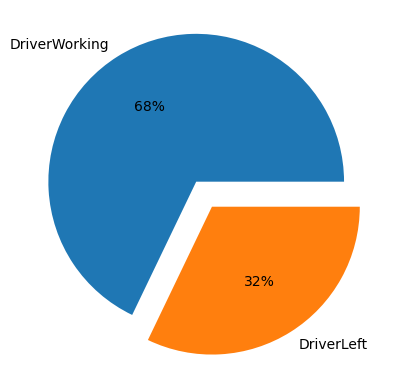

In [18]:
value_counts = grouped_data['target'].value_counts()

values = value_counts.to_numpy()
keys = value_counts.keys()
keys = ['DriverLeft' if key==1 else 'DriverWorking' for key in keys]



print(f"Distribution of Target label is \n{value_counts}")
plt.pie(values,labels=keys,explode=[0.1,0.1],autopct='%.0f%%')
plt.show()

<li>We can observe that there Driver left data points are lesser.</li>
<li>This is slightly imbalanced dataset and we may need to balance it if the results are poor for minority class.</li>

#### Visualizing correlation among numerical features and target

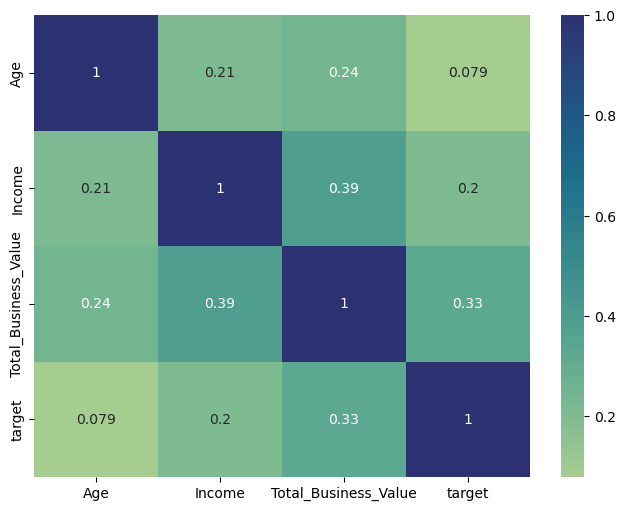

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(grouped_data[numeric_cols+['target']].corr(),annot=True,cmap="crest")
plt.show()

<li>It can be observed that correlaton among features is lesser and not that significant. But we can observe that even for target variable the correlation is lesser.</li>

#### Visualizing Numerical Columns 

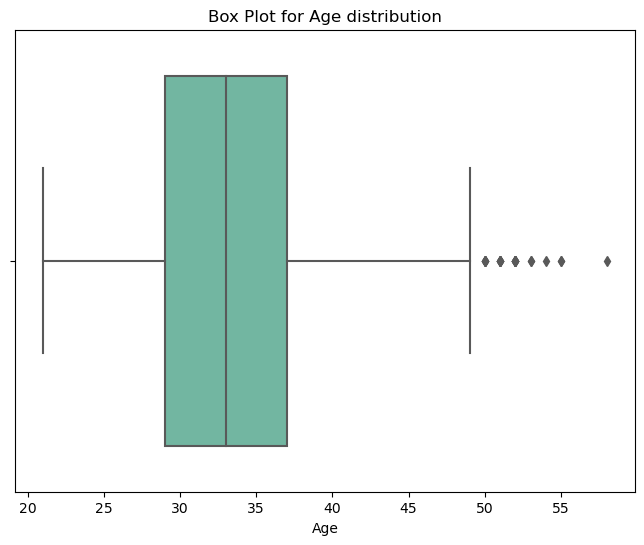

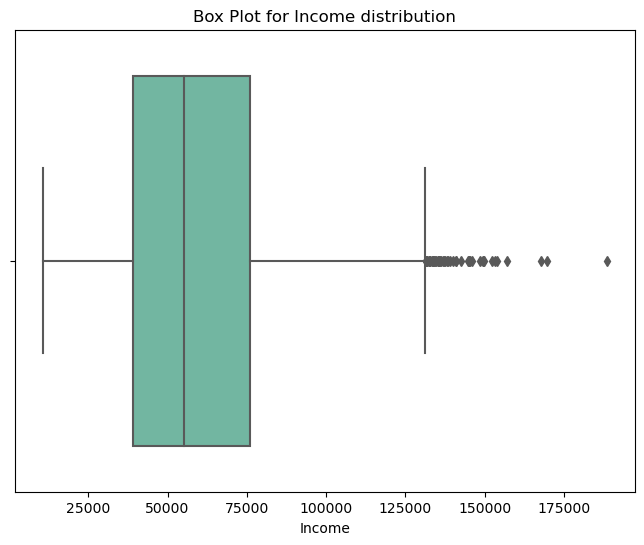

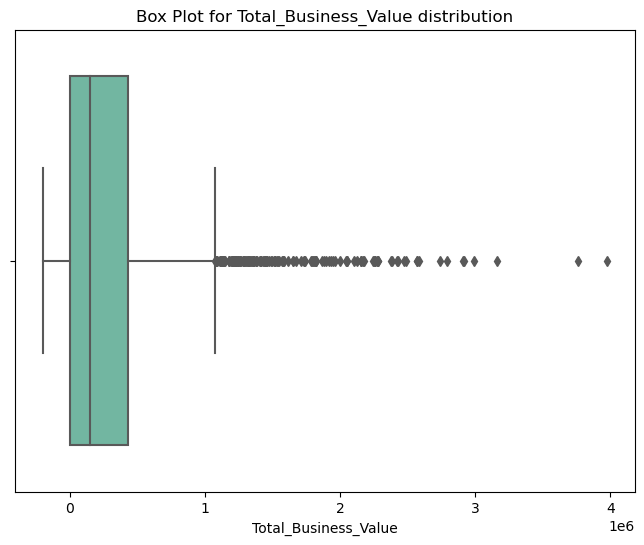

In [20]:
# Visualizing all numerical Features
for feat in numeric_cols:
    plt.figure(figsize=(8,6))
    sns.boxplot(grouped_data,x=feat,hue='target',palette='Set2')
    plt.title(f"Box Plot for {feat} distribution")
    plt.show()

<li>We can observe that there is significant difference in mean for almost all numerical features. Also we can observe that there are possible outliers in the data.</li>
<li>But since the data is lesser, we can consider outlier threshold to be on higher side.</li>

In [21]:
# Outlier Treatment
grouped_data = grouped_data[(grouped_data.Age > grouped_data.Age.quantile(0.01)) & (grouped_data.Age < grouped_data.Age.quantile(0.99))]
grouped_data = grouped_data[(grouped_data.Income > grouped_data.Income.quantile(0.01)) & (grouped_data.Income < grouped_data.Income.quantile(0.99))]
grouped_data = grouped_data[(grouped_data.Total_Business_Value > grouped_data.Total_Business_Value.quantile(0.01))
            & (grouped_data.Total_Business_Value < grouped_data.Total_Business_Value.quantile(0.99))]

In [22]:
grouped_data

,Driver_ID,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total_Business_Value,Quarterly_Rating,rating_increased_flag,income_increased_flag,joining_month,joining_year,target
0,1,28.0,0.0,C23,2,57387,1,1,571860.000000,2,0,0,12,18,0
2,4,43.0,0.0,C13,2,65603,2,2,70000.000000,1,0,0,07,19,0
3,5,29.0,0.0,C9,0,46368,1,1,40120.000000,1,0,0,09,19,0
4,6,31.0,1.0,C11,1,78728,3,3,253000.000000,2,1,0,07,20,1
7,12,35.0,0.0,C23,2,28116,1,1,434530.000000,4,0,0,06,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2374,2781,25.0,0.0,C23,2,46952,2,2,784851.818182,4,1,0,02,20,1
2376,2784,34.0,0.0,C24,0,82815,2,3,906200.833333,4,1,0,10,15,1
2378,2786,45.0,0.0,C19,0,35370,2,2,312787.777778,2,0,0,07,18,0
2379,2787,28.0,1.0,C20,2,69498,1,1,162971.666667,2,0,0,07,18,0


#### Visualizing Categorical Columns

In [23]:
# Below functions were created as part of EDA assignment and are being reused here. These functions were submitted in previous assignment as well.

# Reference for this function : https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+0.005*y[0],y[i],ha="center")



def plot_bar_plot(dataframe, column, fig_size=(12, 5), width=0.5, add_labels = True,title=None,sort_index = False, show=True, ylabel="#Count"):
    ''' Plots Bar plot according the input data and parameters

        Args:
            dataframe   : Input Pandas Dataframe
            column      : Column to consider from input dataframe
            fig_size    : Plot figure size
            width       : Width of bar blocks
            title       : String input for title
            sort_index  : if x labels are numeric then these have to be used
            show        : Boolean flag to show plt plots
            ylabels     : Custom ylabel if required
    '''
    # Splitting Dataframe column values in key value pairs
    if sort_index:
        valuecounts = dataframe[column].value_counts().sort_index()
    else:
        valuecounts = dataframe[column].value_counts()
        
    # print(valuecounts)
    keys = valuecounts.keys()
    values = valuecounts.values
    if show:
        # Creating required bar plot
        fig, ax = plt.subplots(figsize = fig_size)
        sns.barplot(x = keys, y = values, width = width,color='#5bc9a3')
    
        if add_labels:
            # adding labels
            addlabels( keys, values)
        
        plt.ylabel(ylabel)
        
        if title:
            plt.title(title)
        else:
            plt.title(f"{column} Distribution")
            
        plt.show()
    else:
        sns.barplot(x = keys, y = values, width = width,color='#5bc9a3')
        if add_labels:
            # adding labels
            addlabels( keys, values)

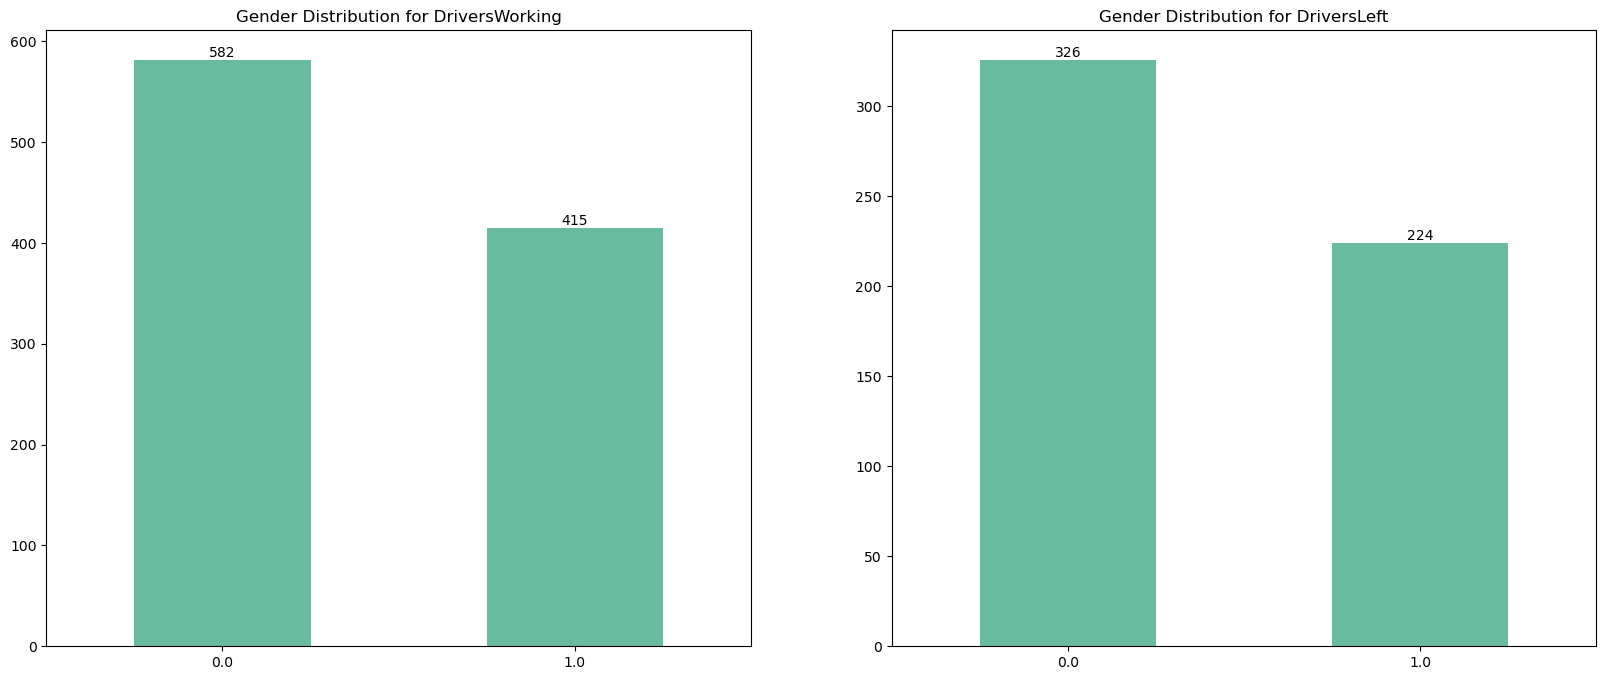

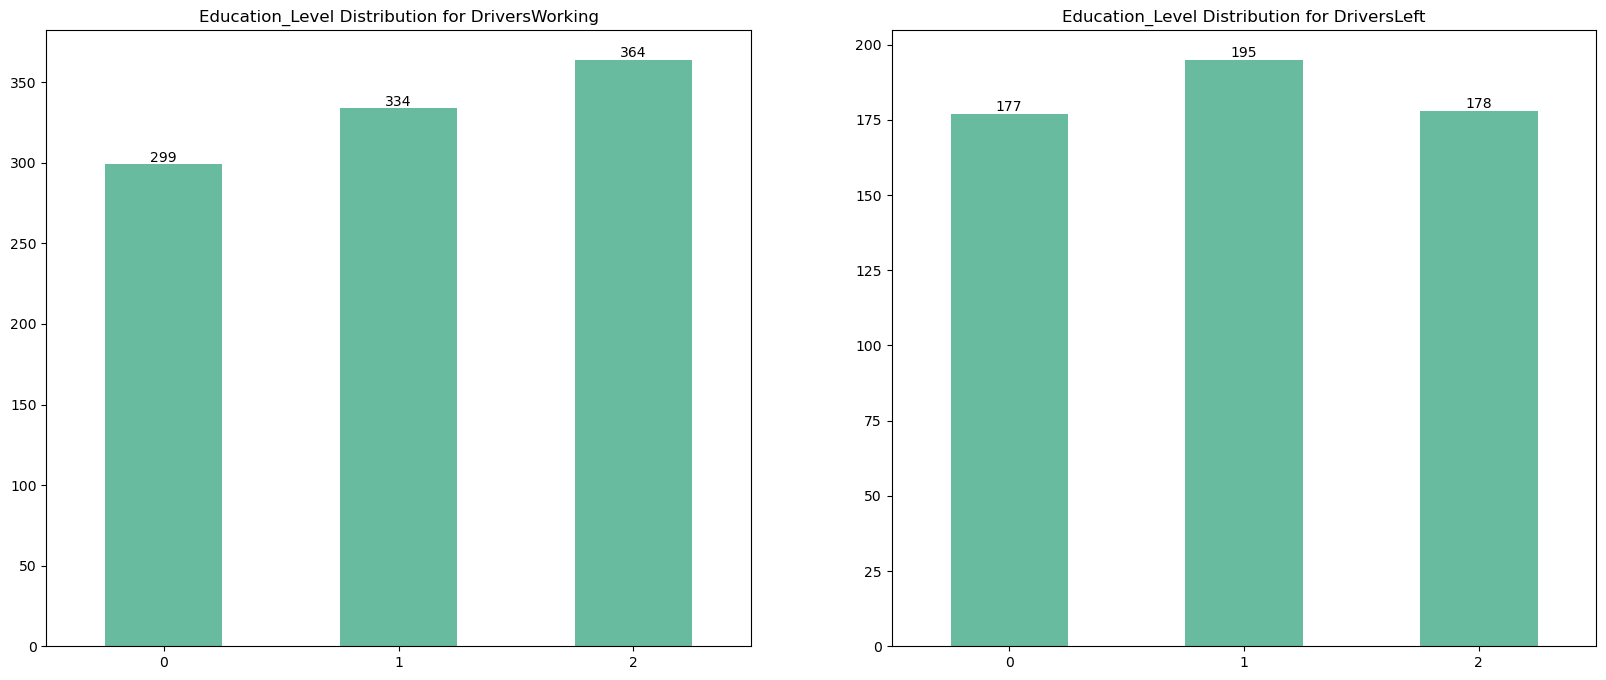

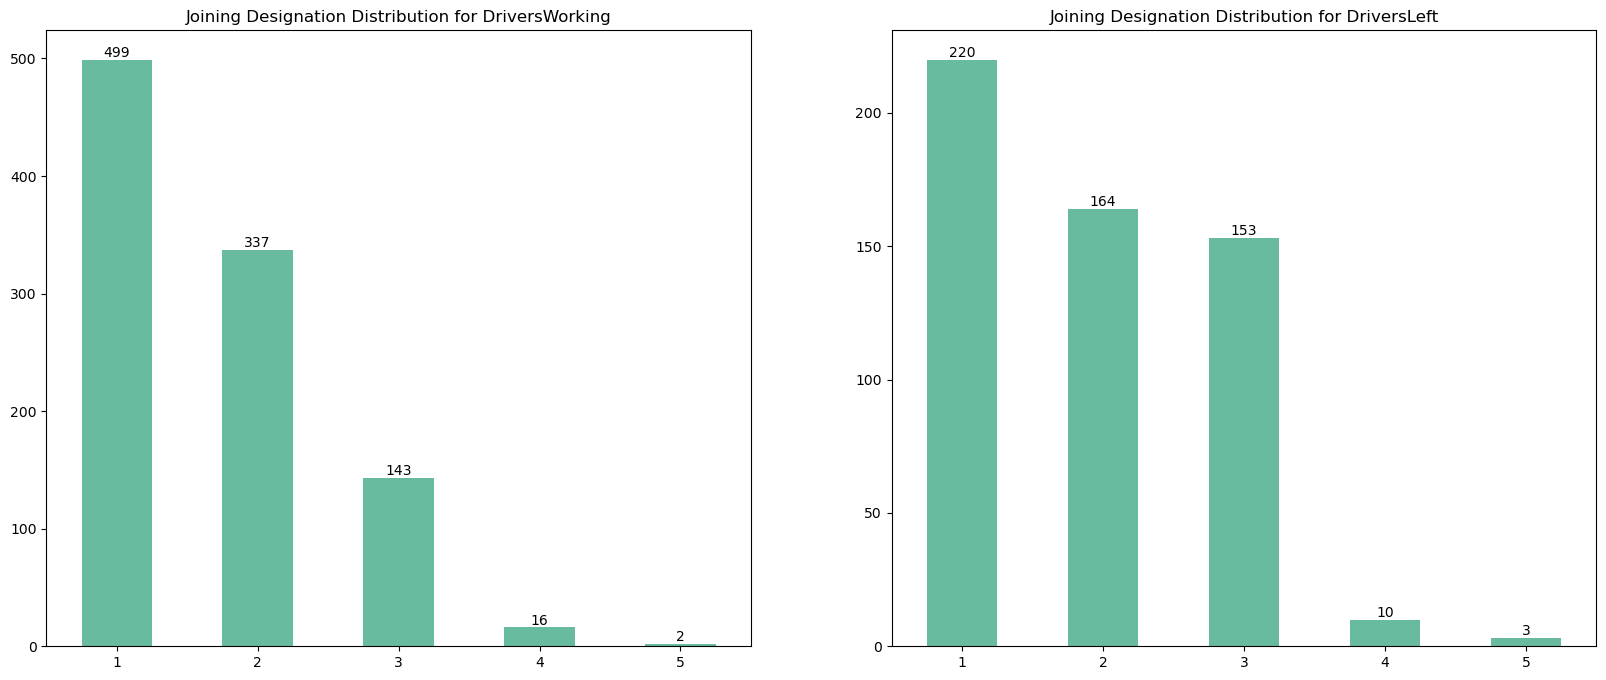

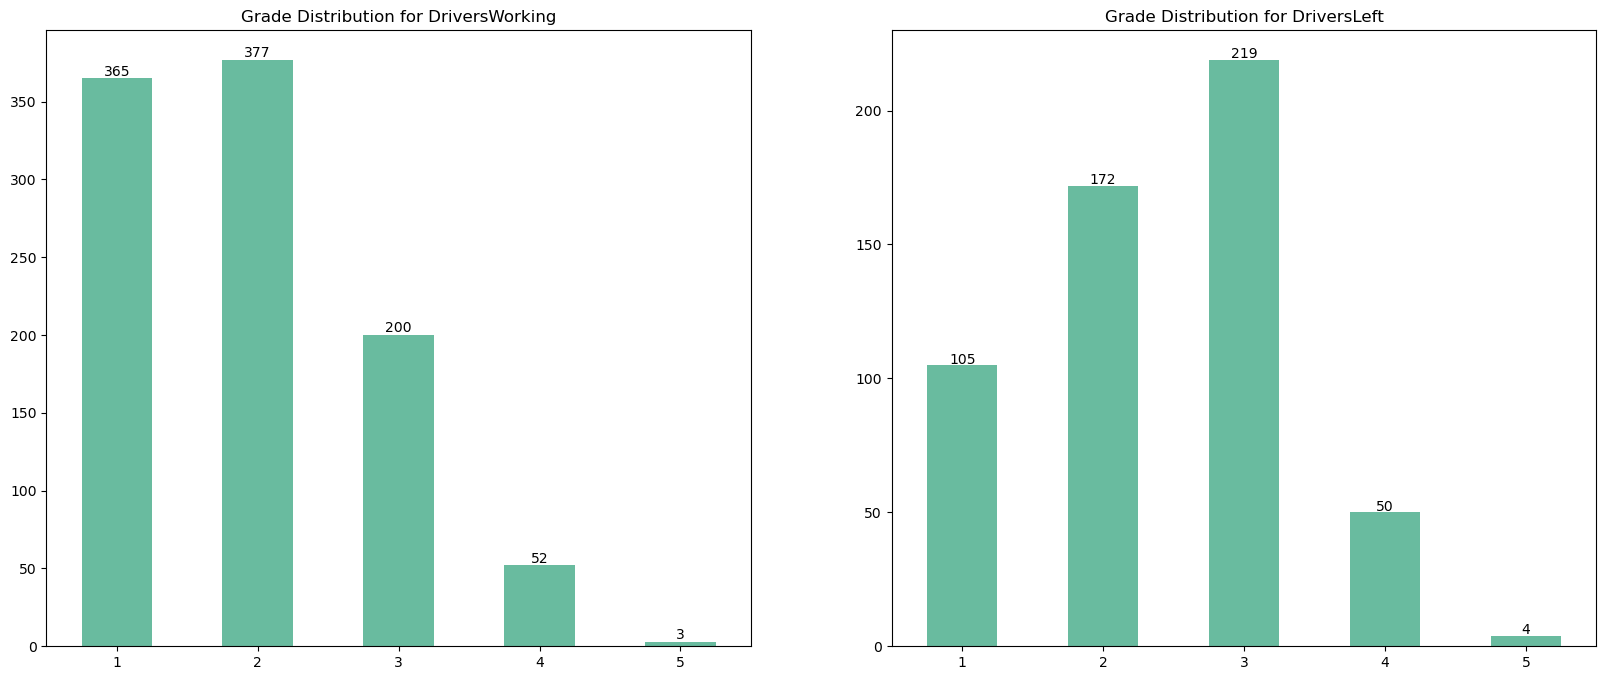

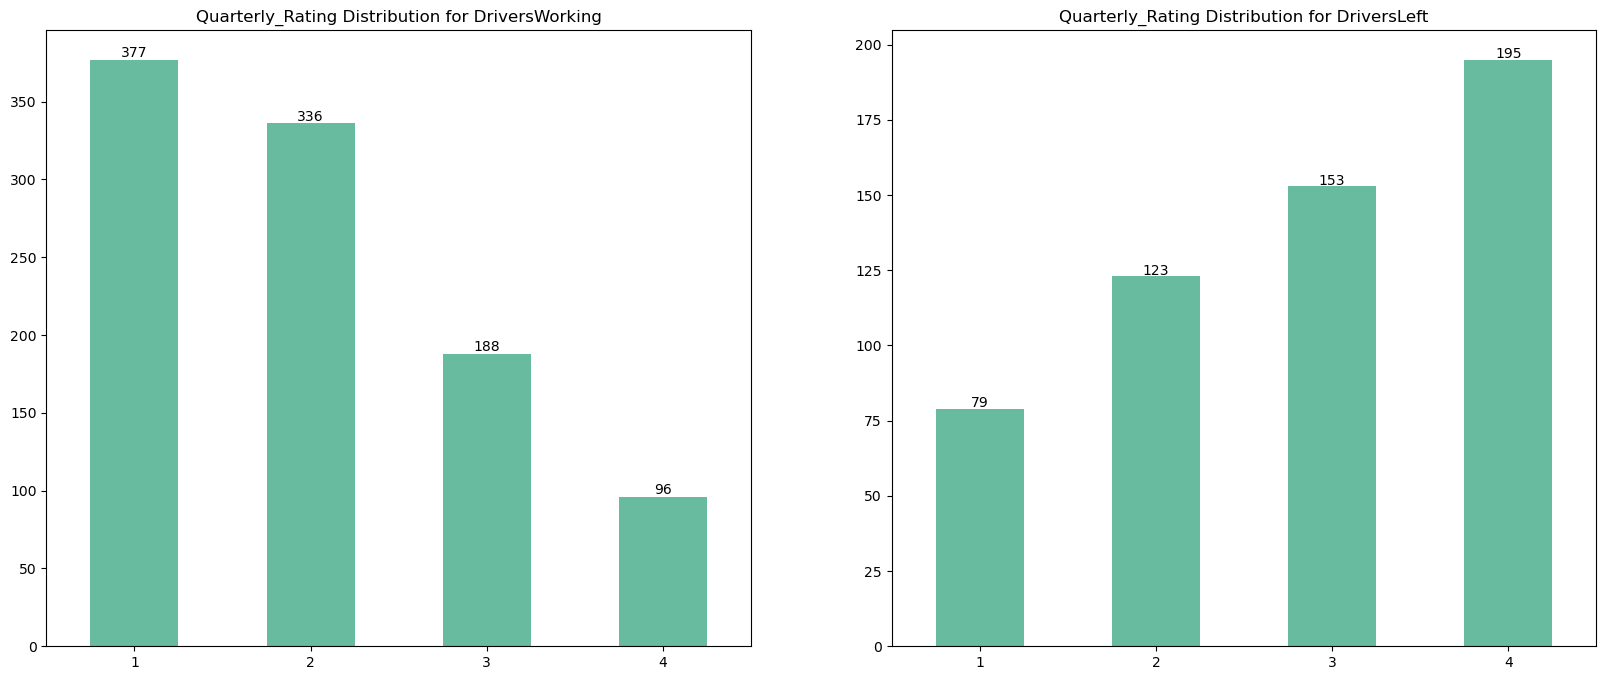

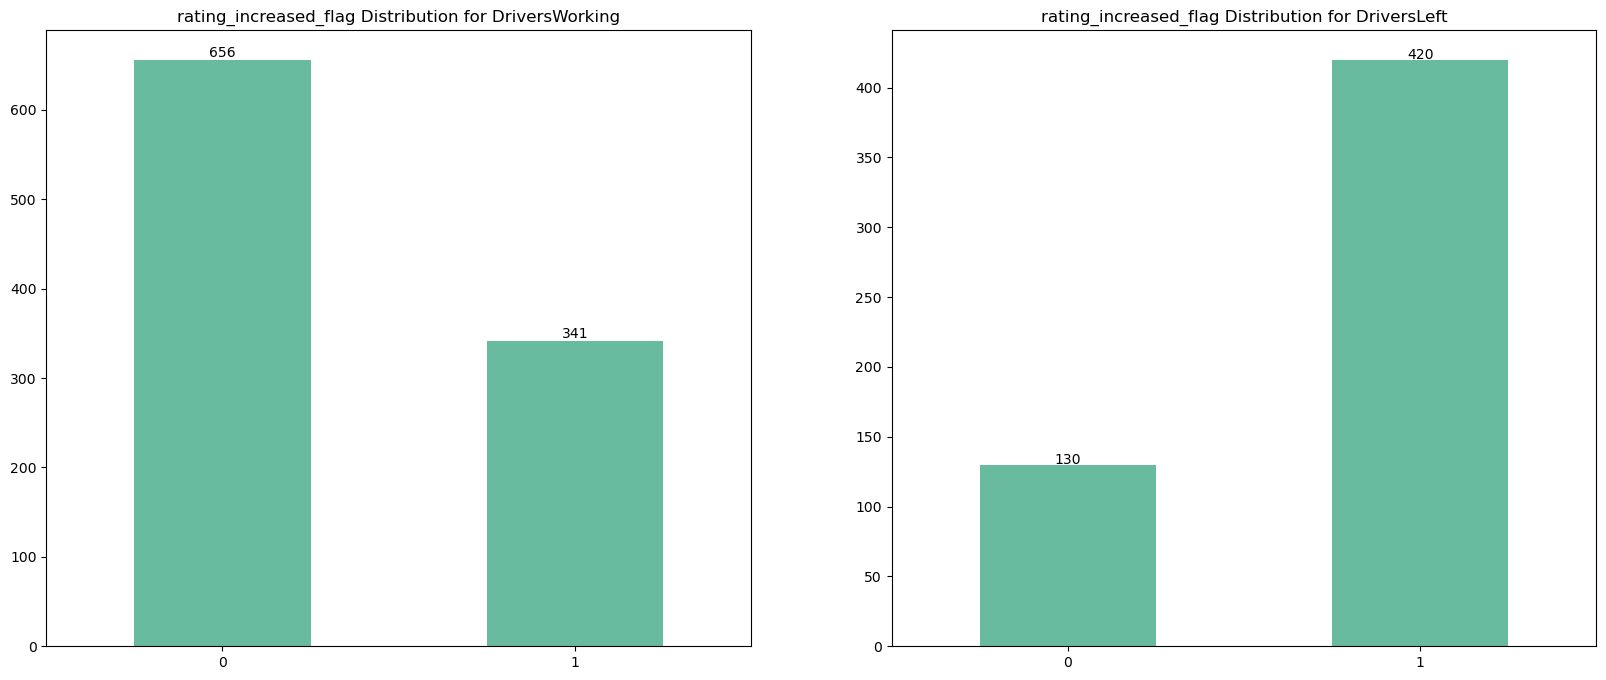

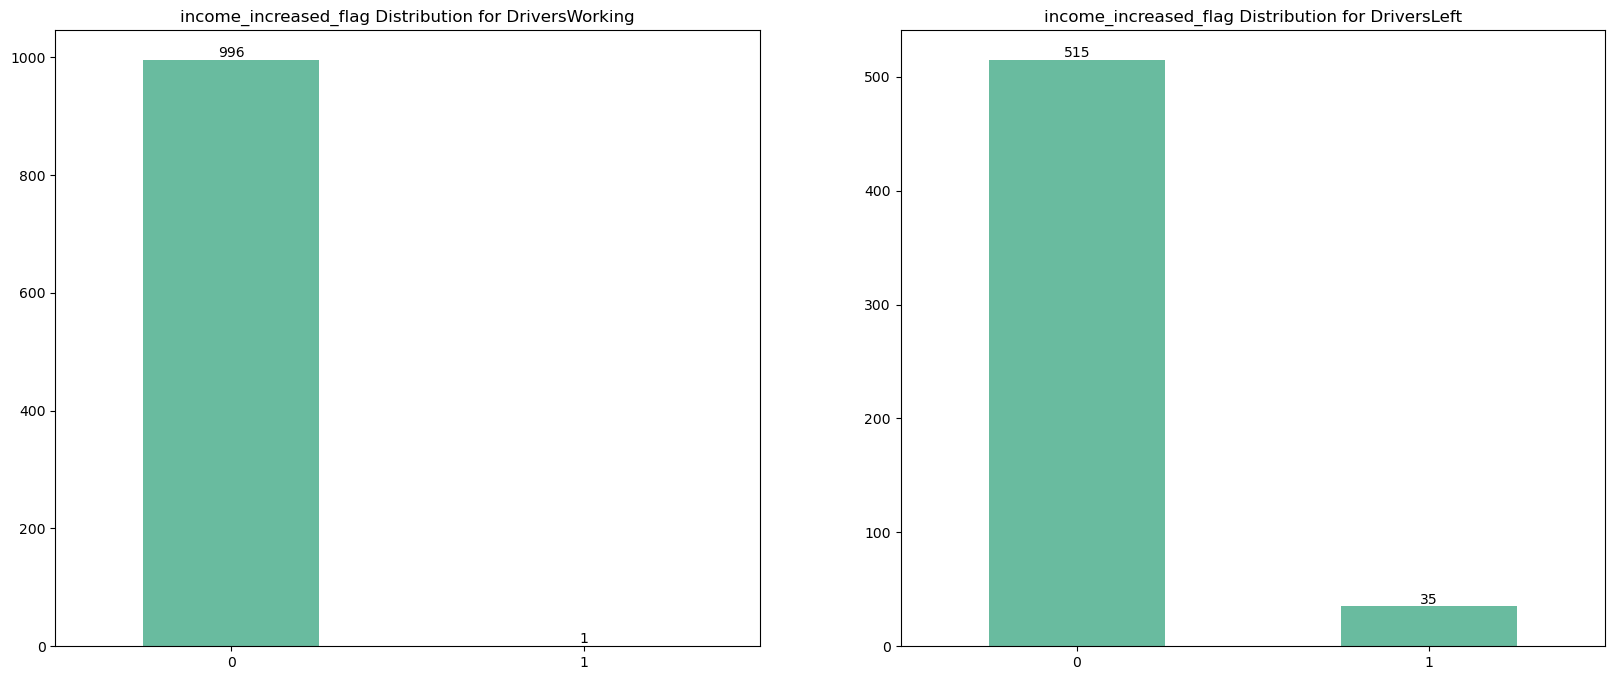

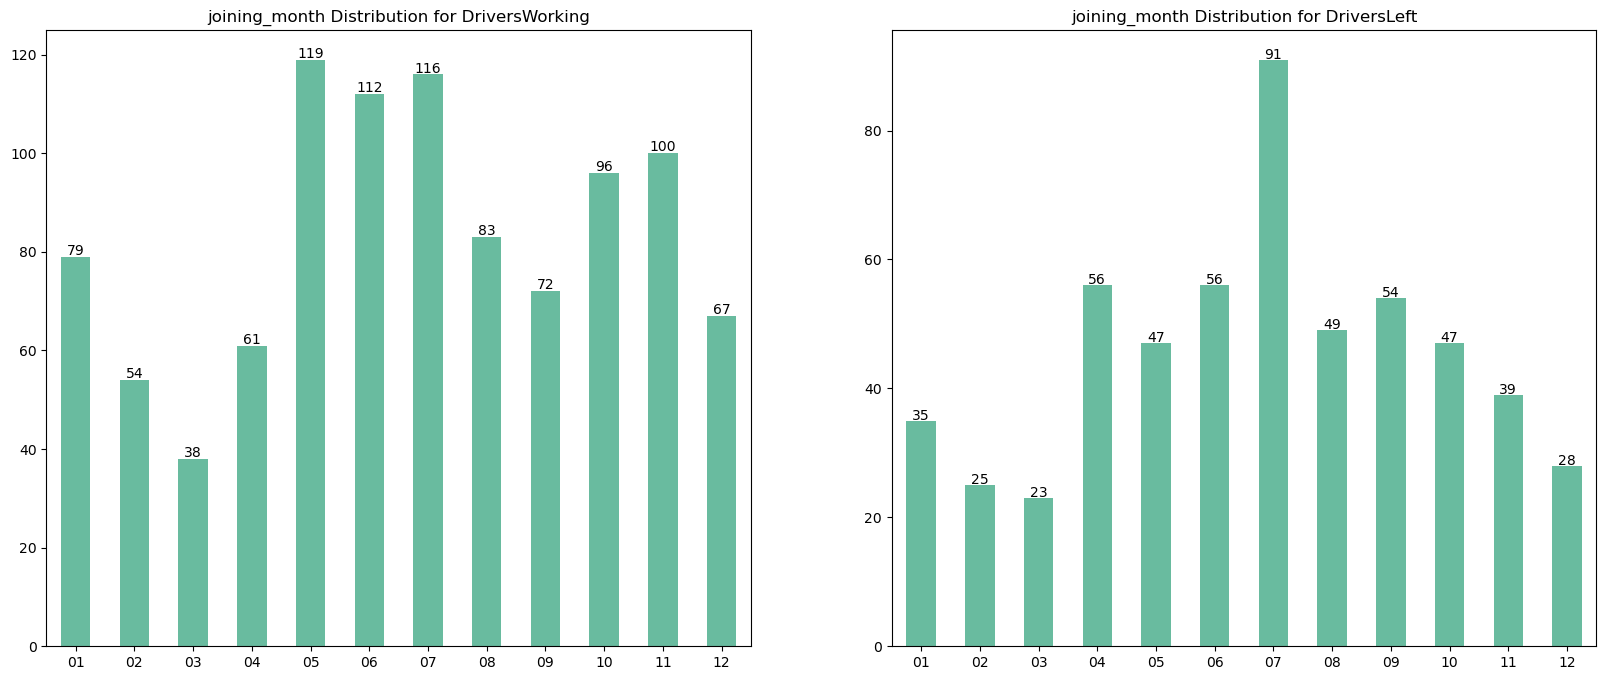

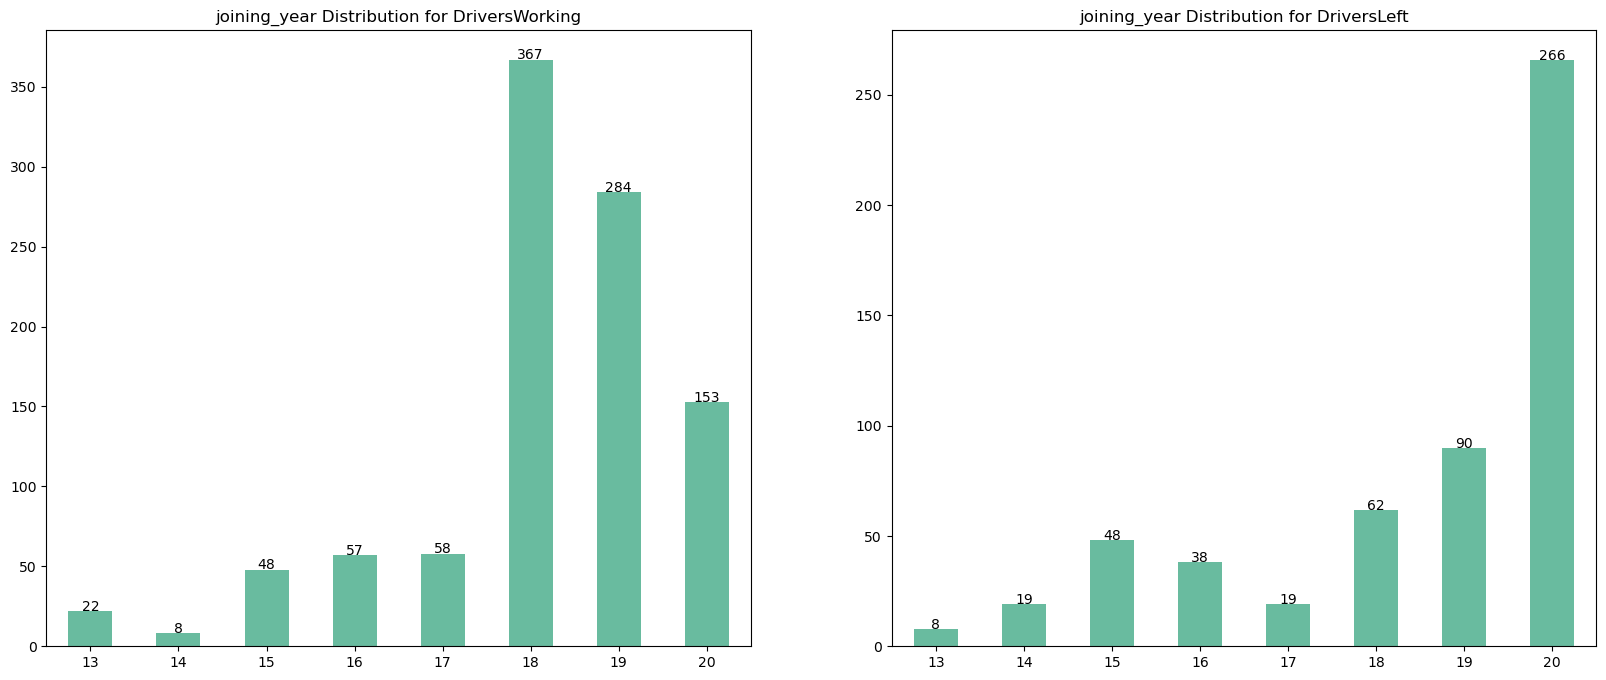

In [24]:
# rray(['Fully Paid', 'Charged Off']
for col in categorical_cols:
    # col = 'grade'
    plt.figure(figsize=(20,8))
    sub = plt.subplot(121)
    plot_bar_plot(grouped_data[grouped_data.target==0],column=col,show=False,sort_index=True)
    sub.set_title(f"{col} Distribution for DriversWorking")
    sub = plt.subplot(122)
    plot_bar_plot(grouped_data[grouped_data.target==1],column=col,show=False,sort_index=True)
    sub.set_title(f"{col} Distribution for DriversLeft")
    plt.show()

<li>Gender distribution is alomst equal for both the classes. That means there is no impact </li>
<li>From dirvers education level, dirvers with education level 1 or 0 have higher proportion of leaving compared to drivers with education level 2.</li>
<li>When it comes to joining designation, drivers with joining designation 3 have higher proportion of leaving.</li>
<li>It is also evident that drivers with lower grades have high tendency of leaving.</li>
<li>Also quarterly rating is major factor contributing to drivers leaving. Drivers with higher ratings (e.g. 4) have high tendancy to leave.</li>
<li>It can also be derived from the plots that if the rating has increased then Drivers tend to leave.</li>
<li>Although joining dates are from 2013 to 2020 but We have two years of leaving date data and most of the drivers left had joining in year 2020.</li>

## Data Preprocessing

In [25]:
print("Data column and the data type : \n")
print(grouped_data.info())
print("\n\nNumber of Unique values for each column : \n\n",grouped_data.nunique())

Data column and the data type : 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1547 entries, 0 to 2380
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Driver_ID              1547 non-null   int64  
 1   Age                    1547 non-null   float64
 2   Gender                 1547 non-null   float64
 3   City                   1547 non-null   object 
 4   Education_Level        1547 non-null   int64  
 5   Income                 1547 non-null   int64  
 6   Joining Designation    1547 non-null   int64  
 7   Grade                  1547 non-null   int64  
 8   Total_Business_Value   1547 non-null   float64
 9   Quarterly_Rating       1547 non-null   int64  
 10  rating_increased_flag  1547 non-null   int64  
 11  income_increased_flag  1547 non-null   int64  
 12  joining_month          1547 non-null   object 
 13  joining_year           1547 non-null   object 
 14  target                

<li> Based in this unique values and data types, we can decide whether to treat these features as categorical or numerical.</li>

In [26]:
# Dropping ID column since, it is not required in further part of this notebook
grouped_data.drop('Driver_ID',axis=1,inplace=True)

#### Train Test Split

##### We are considering below class labeling
<li>0 - Driver Still working</li>
<li>1 - Driver Left</li>

In [27]:
from sklearn.model_selection import train_test_split

Y = grouped_data['target'].values

X = grouped_data.drop(['target'],axis=1)

# defining random state to get similar outputs for each run
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=0)

In [28]:
print(f"Train data is of shape : {x_train.shape} and respective label's shape is : {y_train.shape}")
print(f"Test data is of shape : {x_test.shape} and respective label's shape is : {y_test.shape}")

Train data is of shape : (1237, 13) and respective label's shape is : (1237,)
Test data is of shape : (310, 13) and respective label's shape is : (310,)


#### Preprocessing 

In [29]:
# importing required libraries
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,LabelEncoder

# Defining preprocessing objects
onehot_encoder = OneHotEncoder(handle_unknown='ignore')
scaler = MinMaxScaler()

In [30]:
# Processing numeric features
numerical_feat_train = scaler.fit_transform(x_train[numeric_cols].values)
numerical_feat_test = scaler.transform(x_test[numeric_cols].values)


# Processing categorical features
categorical_feat_train = onehot_encoder.fit_transform(x_train[categorical_cols])
categorical_feat_test = onehot_encoder.transform(x_test[categorical_cols])

print(f"Train Numerical feature array is of shape : {numerical_feat_train.shape} and respective categorical feature array is of shape : {categorical_feat_train.shape}")
print(f"Test Numerical feature array is of shape : {numerical_feat_test.shape} and respective categorical feature array is of shape : {categorical_feat_test.shape}")

Train Numerical feature array is of shape : (1237, 3) and respective categorical feature array is of shape : (1237, 43)
Test Numerical feature array is of shape : (310, 3) and respective categorical feature array is of shape : (310, 43)


##### Combining both features

In [31]:
feat_train = np.hstack([numerical_feat_train,categorical_feat_train.toarray()])
feat_test = np.hstack([numerical_feat_test,categorical_feat_test.toarray()])

print(f"Train feature array is of shape : {feat_train.shape} and respective label shape is {y_train.shape}")
print(f"Test feature array is of shape : {feat_test.shape} and respective label shape is {y_test.shape}")

Train feature array is of shape : (1237, 46) and respective label shape is (1237,)
Test feature array is of shape : (310, 46) and respective label shape is (310,)


## Model Training and Performance Metrics

### 1. Decision Tree Classifier

In [32]:
# Importing required library classes and functions
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,roc_curve

In [33]:
dt_classifier = DecisionTreeClassifier()

# defining parm_grid for hyperparameter tuning
param_grid = {
    'criterion':['gini','entropy','log_loss'],
    'max_depth':[1,3,5,10,20,50],
    'min_samples_split':[5,10,30,50,100,200,500]
}

# defining Grid Search object for hyperparameter tuning
grid_search = GridSearchCV(dt_classifier,param_grid=param_grid,scoring='f1',n_jobs=-1)

# Performing hyperparameter tuningn 
grid_search.fit(feat_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 3, 5, 10, 20, 50],
                         'min_samples_split': [5, 10, 30, 50, 100, 200, 500]},
             scoring='f1')

In [34]:
def print_required_metrics(grid_search_obj,feat_train,y_train,feat_test,y_test):
    
    print("Best parameters obtained with GridSearchCV are :\n",grid_search_obj.best_params_,"\n")
    
    best_classifier = grid_search_obj.best_estimator_

    # getting predictions from best estimator
    y_pred_train = best_classifier.predict(feat_train)
    y_pred_test = best_classifier.predict(feat_test)

    
    print("Training Classification Report is as follows:\n",classification_report(y_train,y_pred_train))
    print("Test Classification Report is as follows:\n",classification_report(y_test,y_pred_test))

    # predicting prob score
    y_score_tr = best_classifier.predict_proba(feat_train)
    y_score_te = best_classifier.predict_proba(feat_test)

    # getting fpr and tpr for ROC curves
    fpr_tr, tpr_tr, thresholds = roc_curve(y_train,y_score_tr[:,1])
    fpr_te, tpr_te, thresholds = roc_curve(y_test,y_score_te[:,1])

    # AUC score calculation
    auc_score_tr = np.trapz(tpr_tr,fpr_tr)
    auc_score_te = np.trapz(tpr_te,fpr_te)

    # plotting ROC curve along with AUC score
    plt.plot(fpr_tr,tpr_tr,label =f'Train AUC = {auc_score_tr:0.2f}')
    plt.plot(fpr_te,tpr_te,label =f'Test AUC = {auc_score_te:0.2f}')
    plt.legend(loc = 'lower right')
    plt.title("Train Data ROC Curve")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()


    # Creating Heatmaps for confusion matrix
    plt.figure(figsize=(16,6))
    sub = plt.subplot(121)
    sns.heatmap(confusion_matrix(y_train,y_pred_train),
                annot=True,cmap="crest",
                fmt='g',
                xticklabels=['DriverWorking','DriverLeft'],
                yticklabels=['DriverWorking','DriverLeft'])
    plt.ylabel("Y True")
    plt.xlabel("Y Pred")
    plt.title("Train confusion Matrix")
    plt.subplot(122)
    sns.heatmap(confusion_matrix(y_test,y_pred_test),
                annot=True,cmap="crest",
                fmt='g',
                xticklabels=['DriverWorking','DriverLeft'],
                yticklabels=['DriverWorking','DriverLeft'])
    plt.ylabel("Y True")
    plt.xlabel("Y Pred")
    plt.title("Test confusion Matrix")
    plt.show()

Best parameters obtained with GridSearchCV are :
 {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 5} 

Training Classification Report is as follows:
               precision    recall  f1-score   support

           0       0.87      0.84      0.86       797
           1       0.73      0.78      0.75       440

    accuracy                           0.82      1237
   macro avg       0.80      0.81      0.81      1237
weighted avg       0.82      0.82      0.82      1237

Test Classification Report is as follows:
               precision    recall  f1-score   support

           0       0.84      0.81      0.83       200
           1       0.68      0.72      0.70       110

    accuracy                           0.78       310
   macro avg       0.76      0.77      0.76       310
weighted avg       0.78      0.78      0.78       310



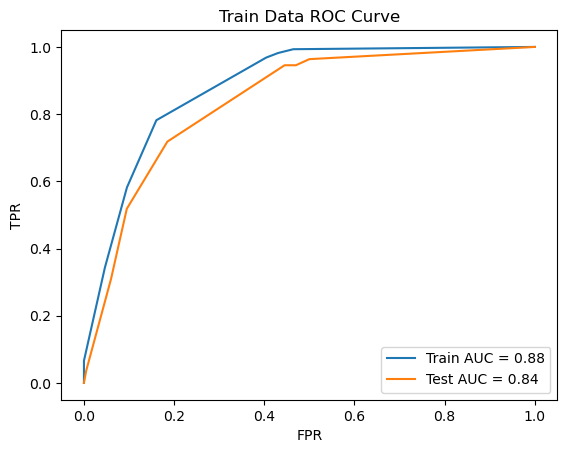

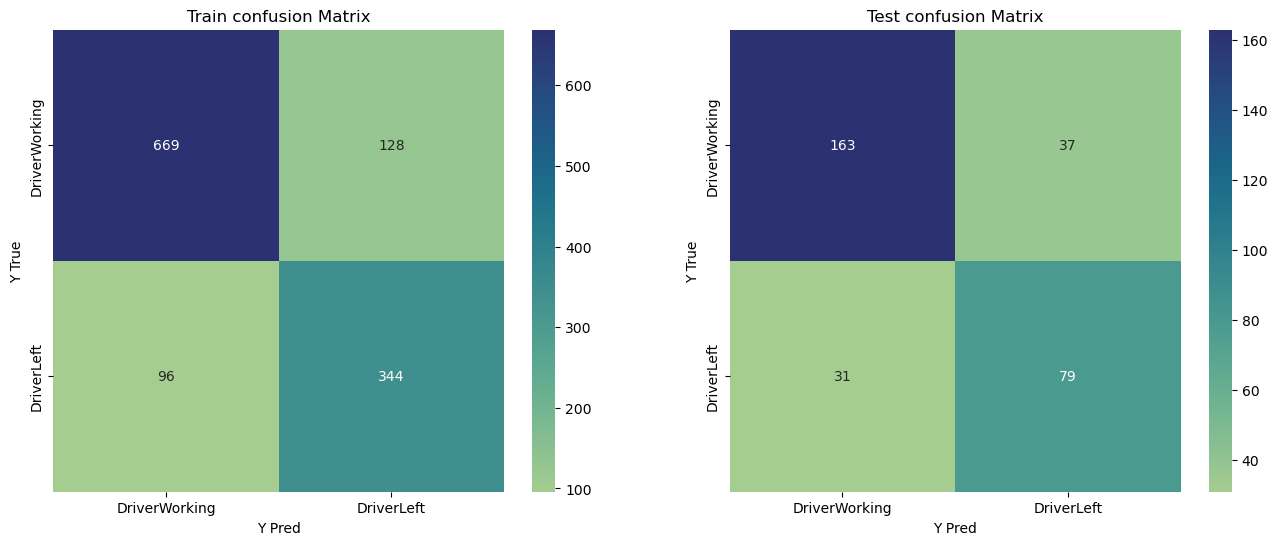

In [35]:
print_required_metrics(grid_search,feat_train,y_train,feat_test,y_test)

<li>We can observe that Decision Tree classifier is performing fairly well on this dataset. </li>
<li>Let us proceed and see how it performs with Bagging and Boosting based techniques.</li>

### Random Forest Classifier (Bagging)

In [36]:
from sklearn.ensemble import RandomForestClassifier

Best parameters obtained with GridSearchCV are :
 {'criterion': 'entropy', 'max_depth': 50, 'min_samples_split': 10, 'n_estimators': 500} 

Training Classification Report is as follows:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       797
           1       0.92      0.93      0.92       440

    accuracy                           0.95      1237
   macro avg       0.94      0.94      0.94      1237
weighted avg       0.95      0.95      0.95      1237

Test Classification Report is as follows:
               precision    recall  f1-score   support

           0       0.85      0.82      0.83       200
           1       0.69      0.74      0.71       110

    accuracy                           0.79       310
   macro avg       0.77      0.78      0.77       310
weighted avg       0.79      0.79      0.79       310



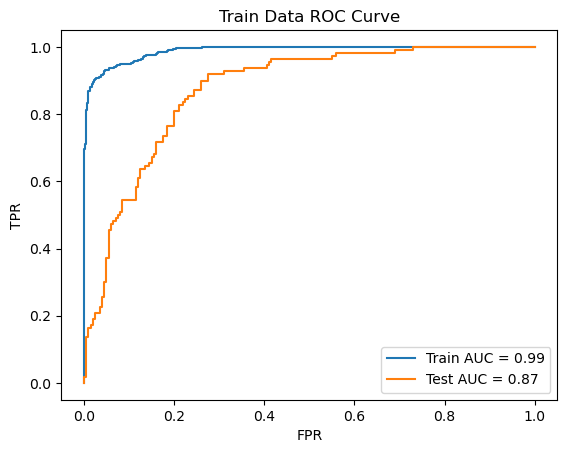

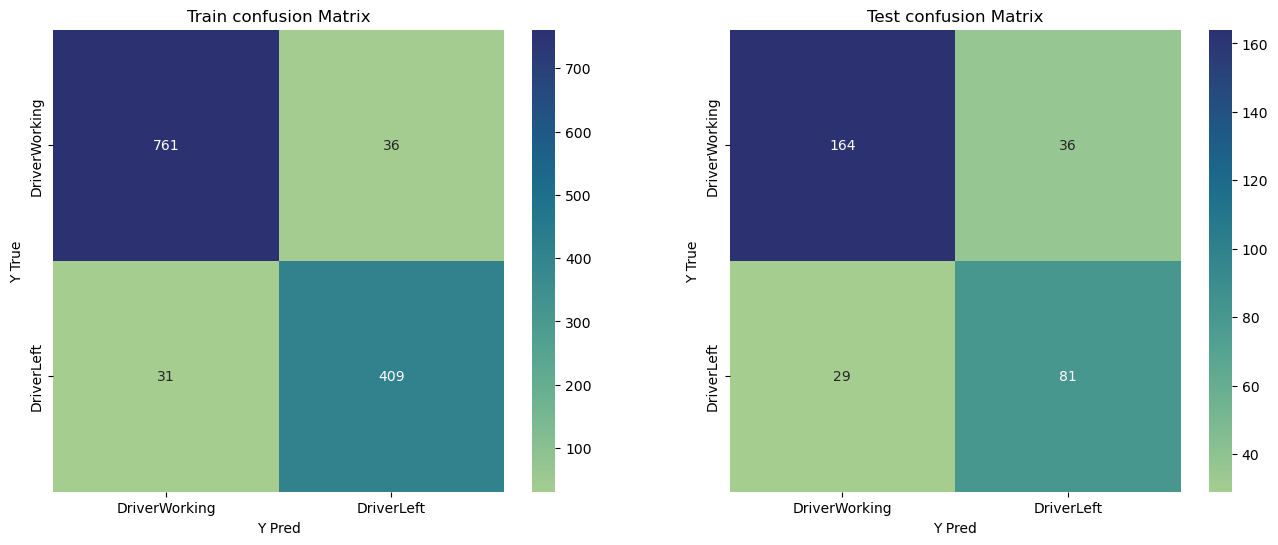

In [37]:
rf_classifier = RandomForestClassifier()

# defining parm_grid for hyperparameter tuning
param_grid = {
    'n_estimators':[10,50,100,300,500],
    'criterion':['gini','entropy','log_loss'],
    'max_depth':[1,3,5,10,20,50],
    'min_samples_split':[5,10,30,50,100,200,500]
}

# defining Grid Search object for hyperparameter tuning with f1 score as metric
grid_search = GridSearchCV(rf_classifier,param_grid=param_grid,scoring='f1',n_jobs=-1)

# Performing hyperparameter tuning
grid_search.fit(feat_train,y_train)

# Printing performance metrics
print_required_metrics(grid_search,feat_train,y_train,feat_test,y_test)

### XGBoost Classifier

In [38]:
from xgboost import XGBClassifier

Best parameters obtained with GridSearchCV are :
 {'colsample_bytree': 0.5, 'learning_rate': 0.15, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.3} 

Training Classification Report is as follows:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       797
           1       0.83      0.83      0.83       440

    accuracy                           0.88      1237
   macro avg       0.87      0.87      0.87      1237
weighted avg       0.88      0.88      0.88      1237

Test Classification Report is as follows:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       200
           1       0.68      0.71      0.70       110

    accuracy                           0.78       310
   macro avg       0.76      0.76      0.76       310
weighted avg       0.78      0.78      0.78       310



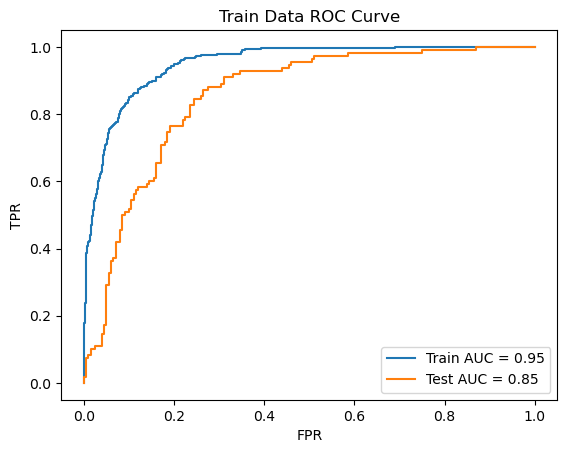

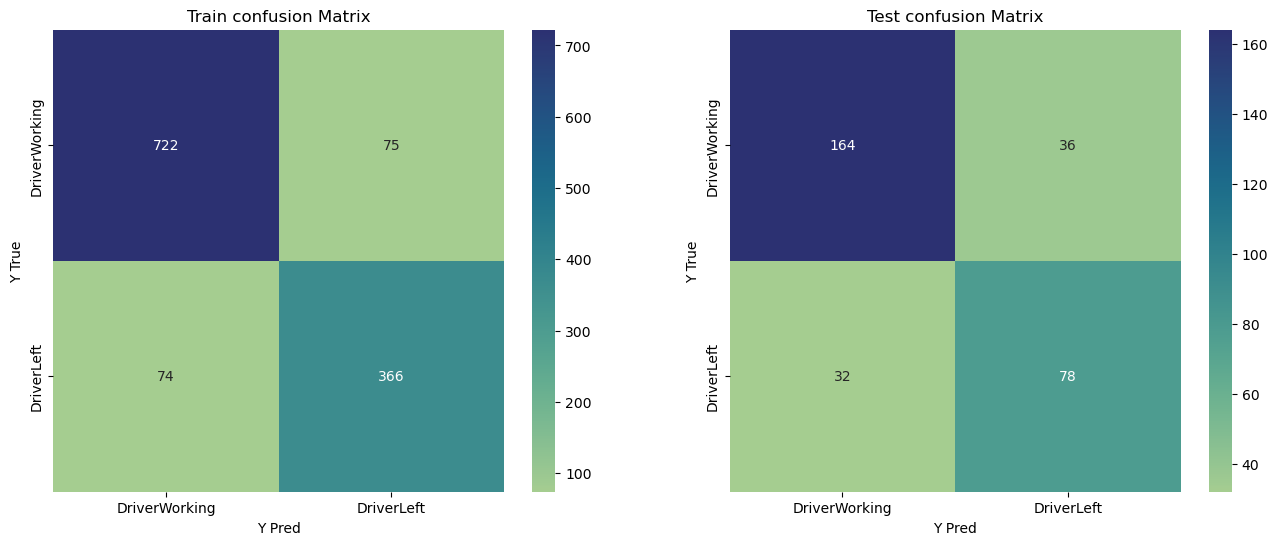

In [39]:
xgb_classifier = XGBClassifier()

# defining parm_grid for hyperparameter tuning
param_grid = {
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000],
     'max_depth':[1,3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}

# defining Grid Search object for hyperparameter tuning with f1 score as metric
grid_search = GridSearchCV(xgb_classifier,param_grid=param_grid,scoring='f1',n_jobs=-1)

# Performing hyperparameter tuning
grid_search.fit(feat_train,y_train)

# Printing performance metrics
print_required_metrics(grid_search,feat_train,y_train,feat_test,y_test)

### Mode Performance Summary 

<table>
    <tr>
        <th>Model Name</th>
        <th>Best Params</th>
        <th>Train f1-score (macro)</th>
        <th>Test f1-score (macro)</th>
        <th>Train ROC AUC Score</th>
        <th>Test ROC AUC Score</th>
    </tr>
    <tr>
        <td>Decision Tree Classifier</td>
        <td>{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 5}</td>
        <td>0.81</td>
        <td>0.76</td>
        <td>0.88</td>
        <td>0.84</td>
    </tr>
    <tr>
        <td>Bagging - Random Forest Classifier</td>
        <td>{'criterion': 'log_loss', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 50}</td>
        <td>0.97</td>
        <td>0.78</td>
        <td>1.0</td>
        <td>0.86</td>
    </tr>
    <tr>
        <td>Boosting - XGBoost Classifier</td>
        <td>{'colsample_bytree': 0.5, 'learning_rate': 0.15, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.3}</td>
        <td>0.87</td>
        <td>0.76</td>
        <td>0.95</td>
        <td>0.85</td>
    </tr>
</table>

<li>From above model summary, overall best performing model is Boosting model. This is because  Bagging model is also performing well but it seems to be overfitting because of a large difference in train and test f1 score.</li>
<li>Let us try to balance the dataset and we can try training the model again.</li>

### XGB Classifier with SMOTE Sampling 

In [40]:
from imblearn.over_sampling import SMOTE

In [41]:
# Reference for below implementation : https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

smote_sampler = SMOTE()

print("Training Data before SMOTE sampling",feat_train.shape,y_train.shape)

x, y = smote_sampler.fit_resample(feat_train, y_train)
print("Training Data before SMOTE sampling",x.shape,y.shape)


Training Data before SMOTE sampling (1237, 46) (1237,)
Training Data before SMOTE sampling (1594, 46) (1594,)


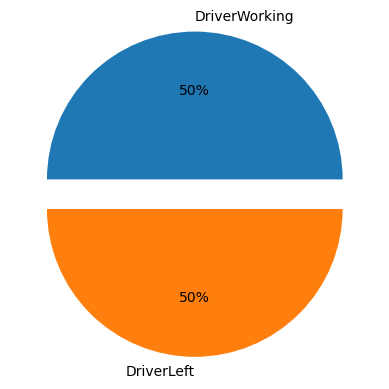

In [42]:
keys, values = np.unique(y,return_counts=True)
keys = ['DriverLeft' if key==1 else 'DriverWorking' for key in keys]

plt.pie(values,labels=keys,explode=[0.1,0.1],autopct='%.0f%%')
plt.show()

Best parameters obtained with GridSearchCV are :
 {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.5} 

Training Classification Report is as follows:
               precision    recall  f1-score   support

           0       0.95      0.86      0.90       797
           1       0.87      0.96      0.91       797

    accuracy                           0.91      1594
   macro avg       0.91      0.91      0.91      1594
weighted avg       0.91      0.91      0.91      1594

Test Classification Report is as follows:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84       200
           1       0.69      0.82      0.75       110

    accuracy                           0.80       310
   macro avg       0.79      0.81      0.79       310
weighted avg       0.82      0.80      0.81       310



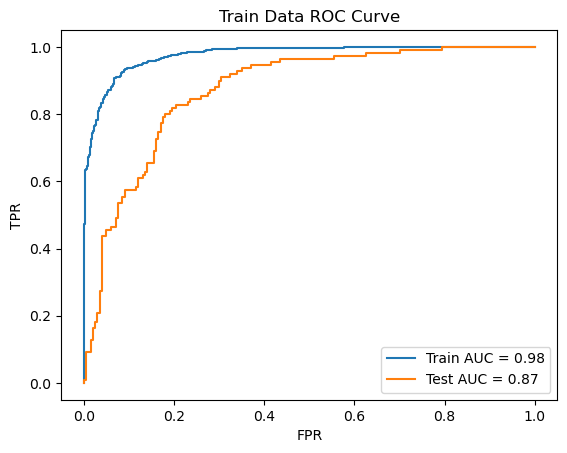

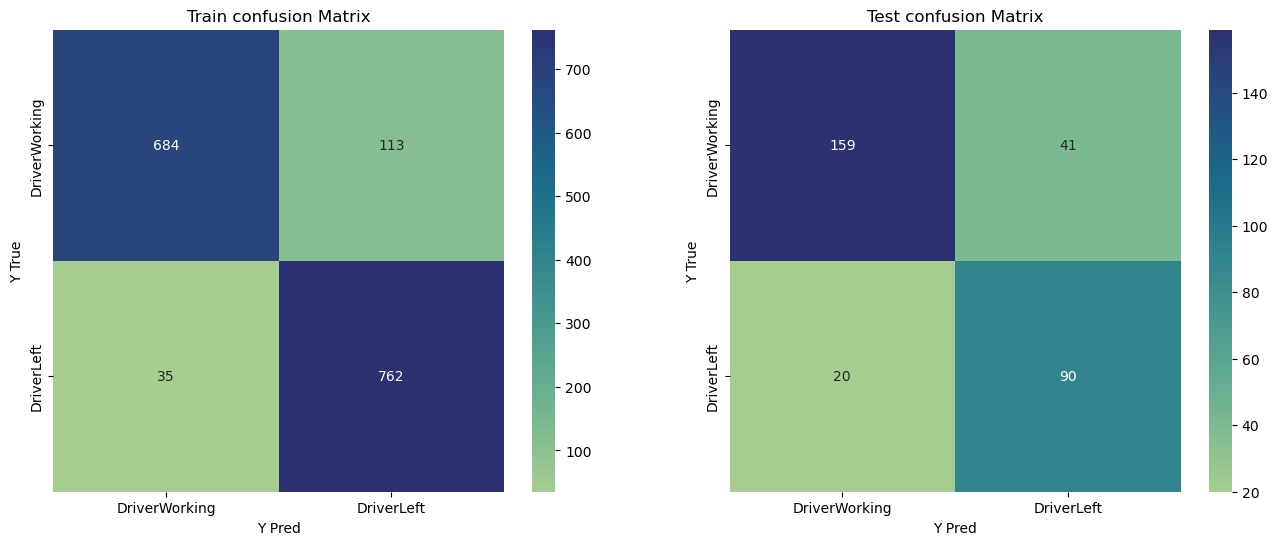

In [43]:
xgb_classifier = XGBClassifier()

# defining parm_grid for hyperparameter tuning
param_grid = {
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000],
     'max_depth':[1,3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}

# defining Grid Search object for hyperparameter tuning with f1 score as metric
grid_search = GridSearchCV(xgb_classifier,param_grid=param_grid,scoring='f1',n_jobs=-1)

# Performing hyperparameter tuning
grid_search.fit(x,y)

# Printing performance metrics
print_required_metrics(grid_search,x,y,feat_test,y_test)

<li>We can see an increase in  train f1 score test f1 score is almost unchanged. That means oversampling on data had minimal impact.</li>
<li>Train AUC score has also increased but test AUC has not increased and thus this indicates moving towards overfitting.</li>

In [44]:
grouped_data

,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total_Business_Value,Quarterly_Rating,rating_increased_flag,income_increased_flag,joining_month,joining_year,target
0,28.0,0.0,C23,2,57387,1,1,571860.000000,2,0,0,12,18,0
2,43.0,0.0,C13,2,65603,2,2,70000.000000,1,0,0,07,19,0
3,29.0,0.0,C9,0,46368,1,1,40120.000000,1,0,0,09,19,0
4,31.0,1.0,C11,1,78728,3,3,253000.000000,2,1,0,07,20,1
7,35.0,0.0,C23,2,28116,1,1,434530.000000,4,0,0,06,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2374,25.0,0.0,C23,2,46952,2,2,784851.818182,4,1,0,02,20,1
2376,34.0,0.0,C24,0,82815,2,3,906200.833333,4,1,0,10,15,1
2378,45.0,0.0,C19,0,35370,2,2,312787.777778,2,0,0,07,18,0
2379,28.0,1.0,C20,2,69498,1,1,162971.666667,2,0,0,07,18,0


## Actionable Insights & Recommendations

<li>First actionable item we have is try out more efficient techniques to handle imbalanced data and see if it improves the performance.</li>
<li>Another action item will be to get more information on Education level i.e. details about qualifications etc. It may not be a graduation but atleast some more information will be useful. </li>
<li>We can get anonymous customer reviews for the drivers and that will be very useful data to have. We can create features from those customer reviews to make predictions even better.</li>
<li>If the driver grades in dataset are given by OLA executives then it would be great if they could add some descriptive keywords suggesting the driver attributes.</li>
<li>Same suggstion will be there for Quarterly rating attributes as grades.</li>
<li>If vehicle details for each driver are also given then that would be great since vehicles can also contribute to driver churn as some platforms may get more proportion of the order having these vehicles.</li>
<li>If vehicle details are given then whether it is self owned or OLA owned will also help.</li>
<li>If possible we can ask feedbacks from drivers on their churn.</li>